In [2]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns

In [3]:
import plotly.graph_objects as go
import plotly.express as px

In [4]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [5]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [6]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [7]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/Alkalinity/ALK_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 100))

### Data Point Average of Alkalinity

In [8]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [9]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 4) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [10]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 4) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [11]:
sliced_data_baseline_plot = sliced_data_baseline.ALK.mean(dim=('y', 'x', 'deptht'))
sliced_data_oae_plot = sliced_data_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [12]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

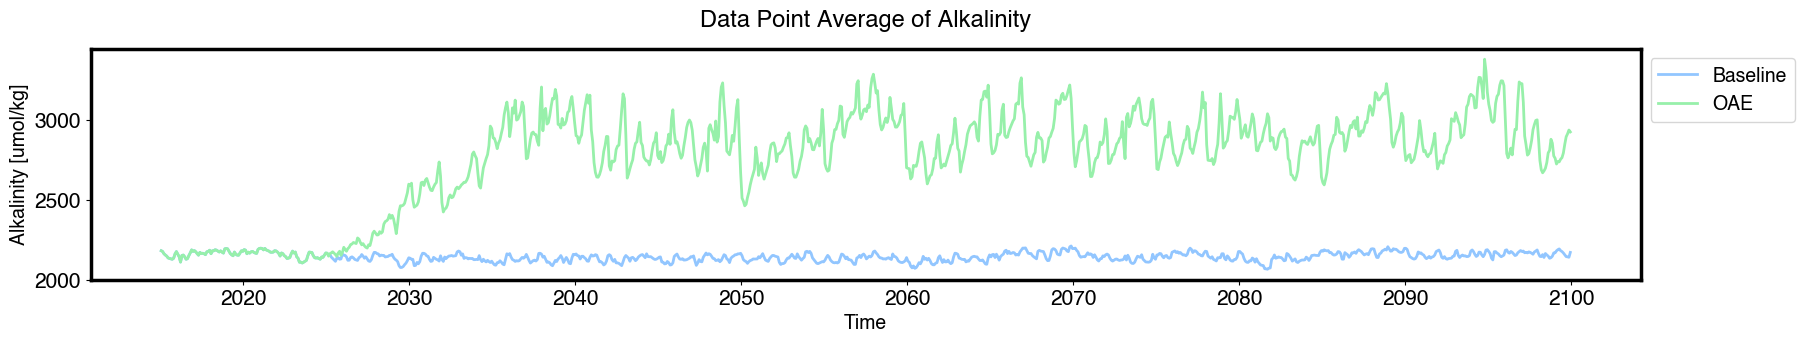

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.ALK, linewidth=2, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [14]:
sliced_frame_baseline_plot = sliced_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [15]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

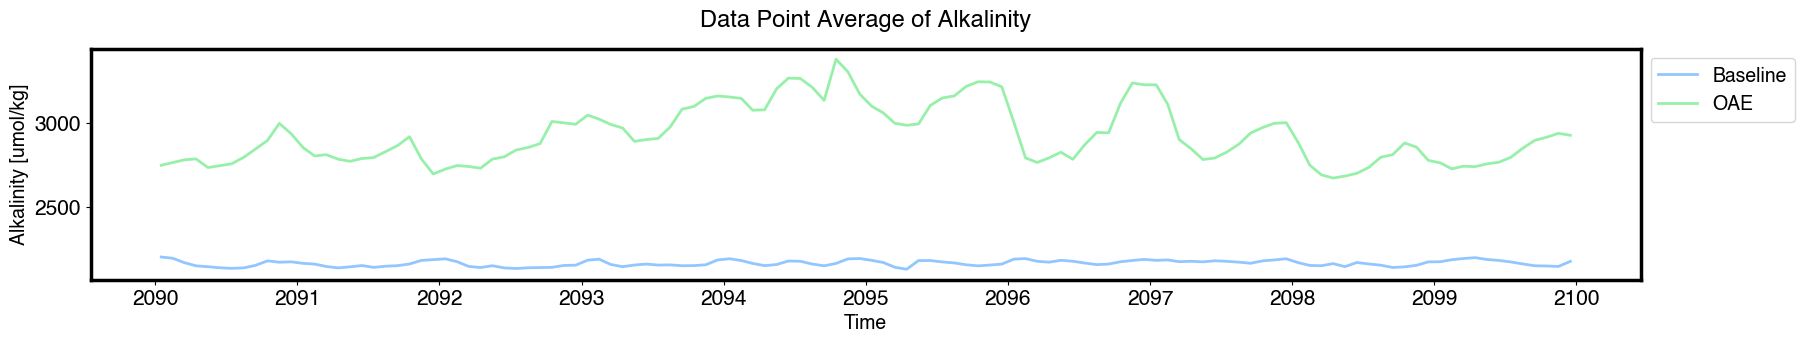

In [16]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ALK, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('Data Point Average of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted Data Point Seasonal Average of Alkalinity

In [17]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_baseline = sliced_data_baseline["ALK"].sel(time_counter=slice(start_date, end_date))

In [18]:
alk_season_summary_baseline = alk_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_baseline = alk_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
alk_seasonal_mean_baseline = alk_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [19]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_oae = sliced_data_oae["ALK"].sel(time_counter=slice(start_date, end_date))

In [20]:
alk_season_summary_oae = alk_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_oae = alk_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
alk_seasonal_mean_oae = alk_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

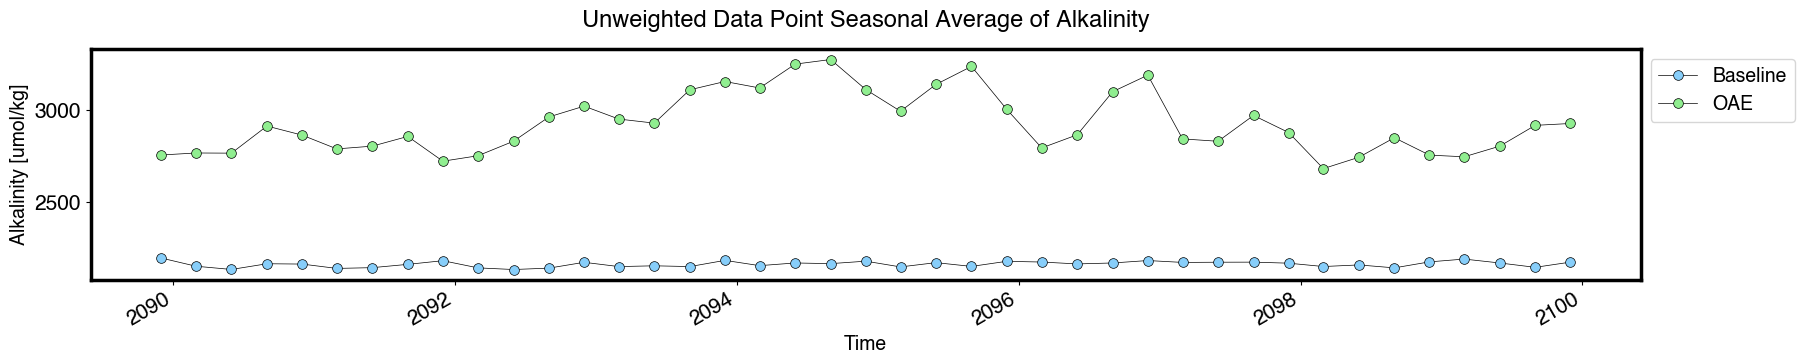

In [21]:
f, ax = plt.subplots(figsize=(20, 3))

alk_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted Data Point Seasonal Average of Alkalinity", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of Alkalinity

In [22]:
month_length_baseline = alk_baseline.time_counter.dt.days_in_month
alk_weighted_mean_baseline = ((alk_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_baseline = alk_weighted_mean_baseline.where(alk_weighted_mean_baseline)
alk_weighted_season_baseline = alk_weighted_mean_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [23]:
month_length_oae = alk_oae.time_counter.dt.days_in_month
alk_weighted_mean_oae = ((alk_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_oae = alk_weighted_mean_oae.where(alk_weighted_mean_oae)
alk_weighted_season_oae = alk_weighted_mean_oae.groupby('time_counter').mean(["y", "x", "deptht"])

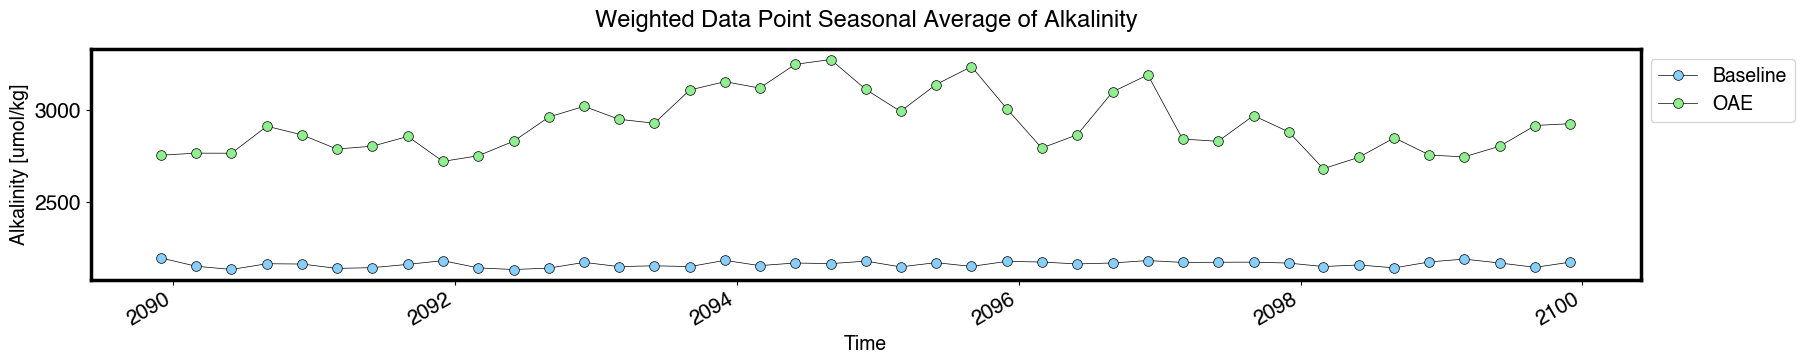

In [24]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
alk_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted Data Point Seasonal Average of Alkalinity", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted Data Point Seasonal Average of Alkalinity (seasons displayed)

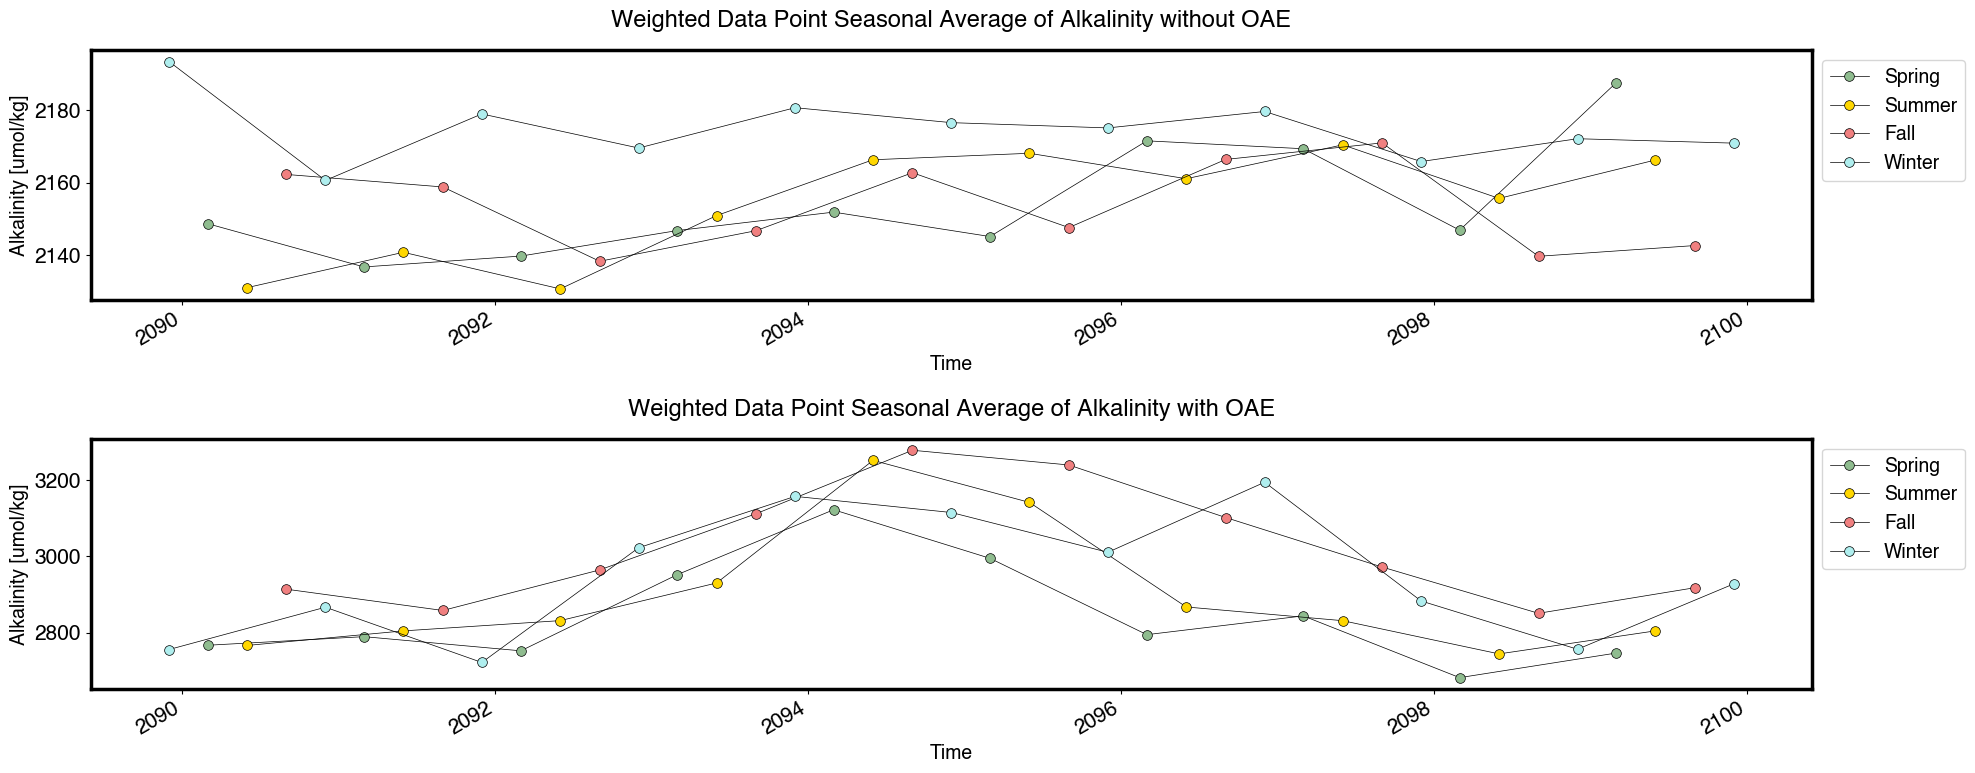

In [25]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in alk_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted Data Point Seasonal Average of Alkalinity without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Alkalinity [umol/kg]', fontsize=14)

for month, arr in alk_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted Data Point Seasonal Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted Data Point Seasonal Average of Alkalinity without OAE (seasons displayed)

In [26]:
alk_weighted_baseline = alk_weighted_season_baseline.to_dataframe('ALK_Flux')
alk_weighted_baseline['Month'] = pd.DatetimeIndex(alk_weighted_baseline.index).month

In [27]:
conditions = [
    (alk_weighted_baseline['Month'] == 3),
    (alk_weighted_baseline['Month'] == 6),
    (alk_weighted_baseline['Month'] == 9),
    (alk_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_baseline['Month'] = np.select(conditions, values)

In [28]:
colors = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

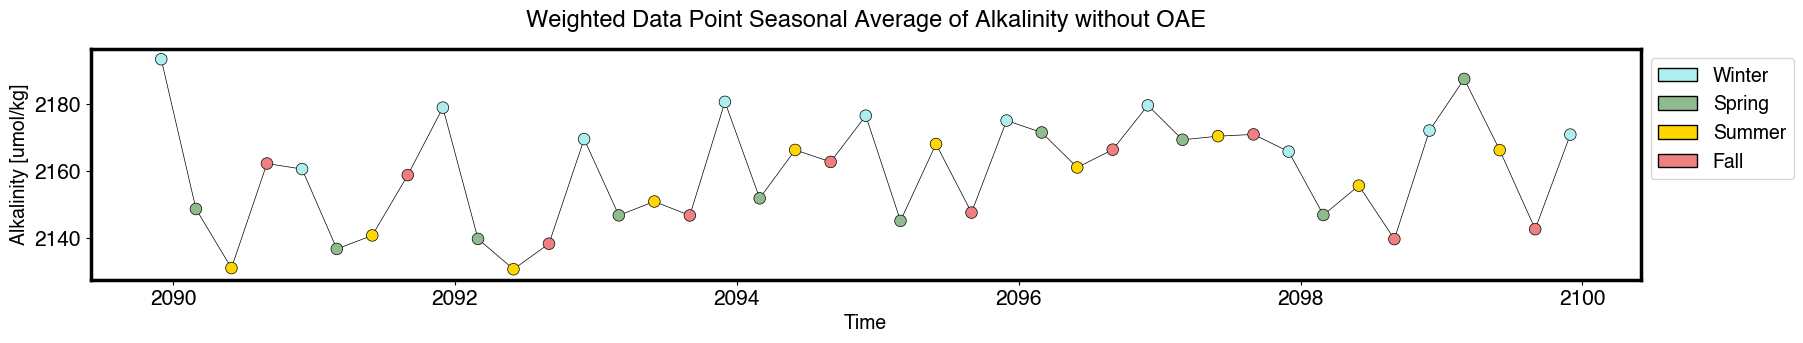

In [29]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.ALK_Flux, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.ALK_Flux, color=alk_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of Alkalinity without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of Alkalinity with OAE (seasons displayed)

In [30]:
alk_weighted_oae = alk_weighted_season_oae.to_dataframe('ALK_Flux')
alk_weighted_oae['Month'] = pd.DatetimeIndex(alk_weighted_oae.index).month

In [31]:
conditions = [
    (alk_weighted_oae['Month'] == 3),
    (alk_weighted_oae['Month'] == 6),
    (alk_weighted_oae['Month'] == 9),
    (alk_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_oae['Month'] = np.select(conditions, values)

In [32]:
colors = dict(zip(alk_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

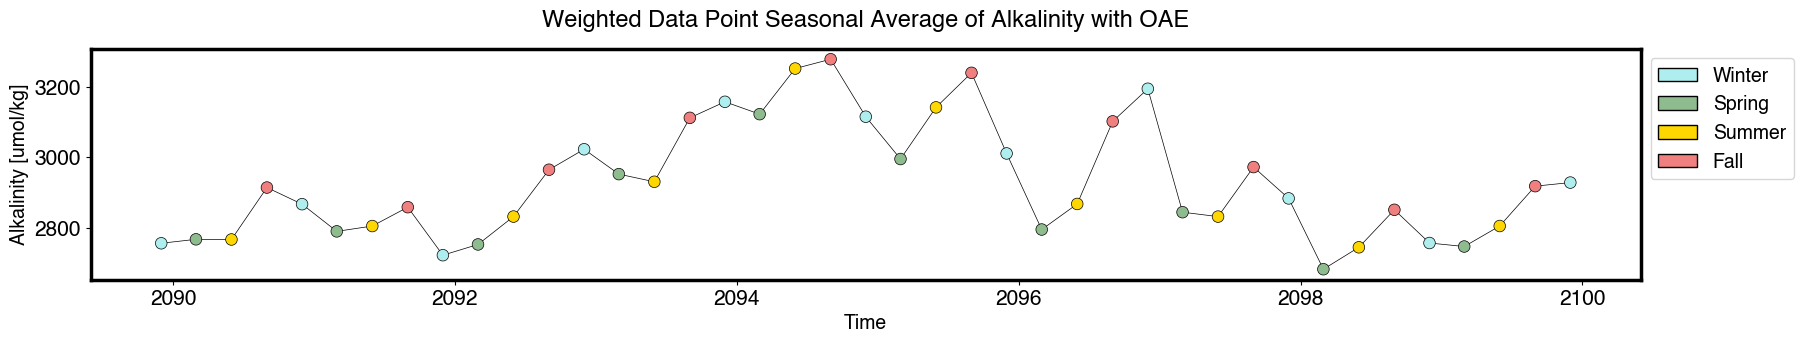

In [33]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.ALK_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.ALK_Flux, color=alk_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted Data Point Seasonal Average of Alkalinity (seasons displayed)

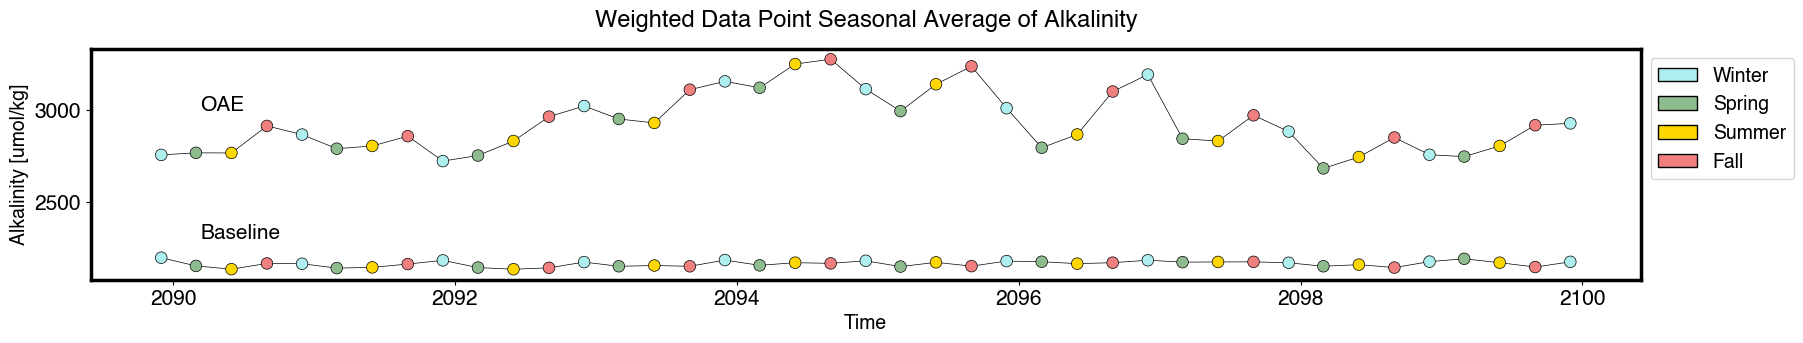

In [35]:
colors = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(alk_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.ALK_Flux, '-', color="black",  linewidth=0.5, zorder=1)
ax.text(43900, 2300, s='Baseline')
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.ALK_Flux, color=alk_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.ALK_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43900, 3000, s='OAE')
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.ALK_Flux, color=alk_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Weighted Data Point Seasonal Average of Alkalinity", fontname="Helvetica", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Alkalinity/figs/DPAlk_seasonal_mean.png')

pass

### Data Point Monthly Average of Alkalinity without OAE

In [40]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

alk_baseline_month = sliced_data_baseline["ALK"].sel(time_counter=slice(start_date_month, end_date_month))
alk_monthly_mean_baseline = alk_baseline_month.groupby('time_counter').mean(["y", "x", "deptht"])

In [41]:
alk_oae_month = sliced_data_oae["ALK"].sel(time_counter=slice(start_date_month, end_date_month))
alk_monthly_mean_oae = alk_oae_month.groupby('time_counter').mean(["y", "x", "deptht"])

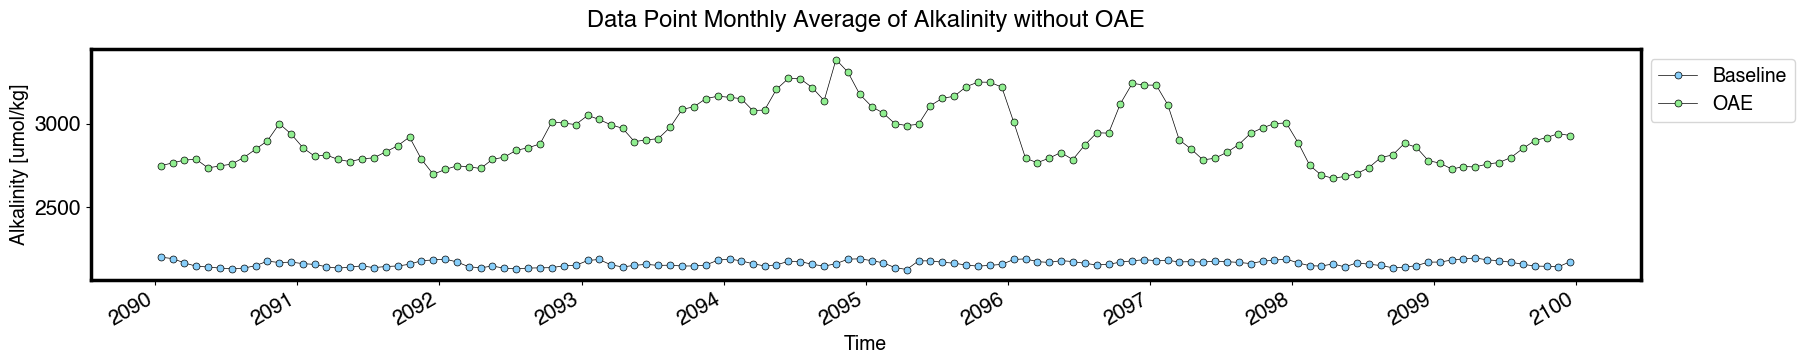

In [42]:
f, ax = plt.subplots(figsize=(20, 3))

alk_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Data Point Monthly Average of Alkalinity without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Data Point Monthly Average of Alkalinity without OAE (months displayed)

In [43]:
alk_baseline_monthly = alk_monthly_mean_baseline.to_dataframe('ALK')
alk_baseline_monthly['Month'] = pd.DatetimeIndex(alk_baseline_monthly.index).month

In [44]:
conditions = [
    (alk_baseline_monthly['Month'] == 1),
    (alk_baseline_monthly['Month'] == 2),
    (alk_baseline_monthly['Month'] == 3),
    (alk_baseline_monthly['Month'] == 4),
    (alk_baseline_monthly['Month'] == 5),
    (alk_baseline_monthly['Month'] == 6),
    (alk_baseline_monthly['Month'] == 7),
    (alk_baseline_monthly['Month'] == 8),
    (alk_baseline_monthly['Month'] == 9),
    (alk_baseline_monthly['Month'] == 10),
    (alk_baseline_monthly['Month'] == 11),
    (alk_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_baseline_monthly['Month'] = np.select(conditions, values)

In [45]:
colors = dict(zip(alk_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

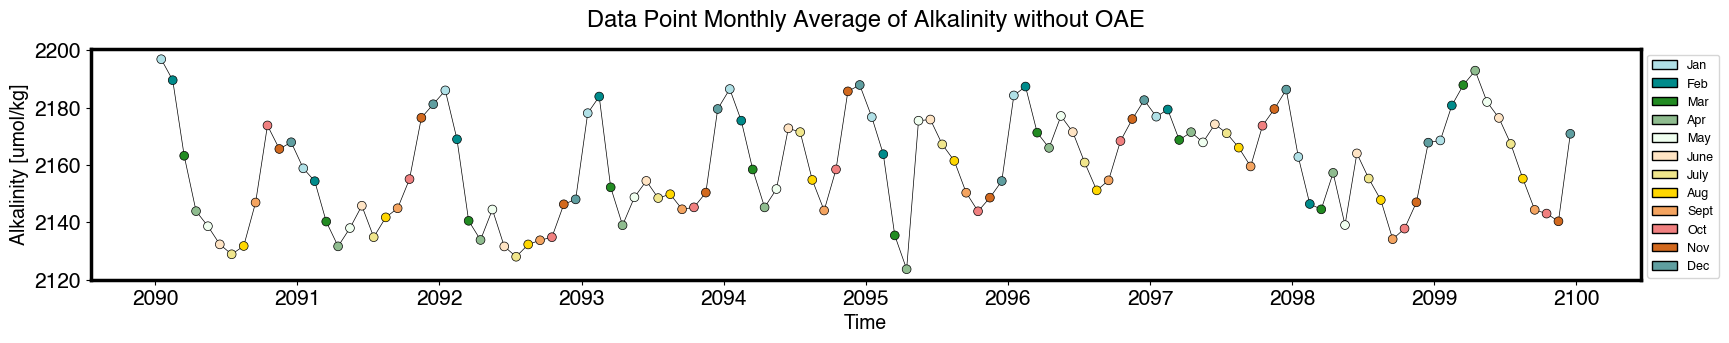

In [46]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.ALK, color=alk_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Data Point Monthly Average of Alkalinity without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of Alkalinity with OAE (months displayed)

In [47]:
alk_oae_monthly = alk_monthly_mean_oae.to_dataframe('ALK')
alk_oae_monthly['Month'] = pd.DatetimeIndex(alk_oae_monthly.index).month

In [48]:
conditions = [
    (alk_oae_monthly['Month'] == 1),
    (alk_oae_monthly['Month'] == 2),
    (alk_oae_monthly['Month'] == 3),
    (alk_oae_monthly['Month'] == 4),
    (alk_oae_monthly['Month'] == 5),
    (alk_oae_monthly['Month'] == 6),
    (alk_oae_monthly['Month'] == 7),
    (alk_oae_monthly['Month'] == 8),
    (alk_oae_monthly['Month'] == 9),
    (alk_oae_monthly['Month'] == 10),
    (alk_oae_monthly['Month'] == 11),
    (alk_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_oae_monthly['Month'] = np.select(conditions, values)

In [49]:
colors = dict(zip(alk_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

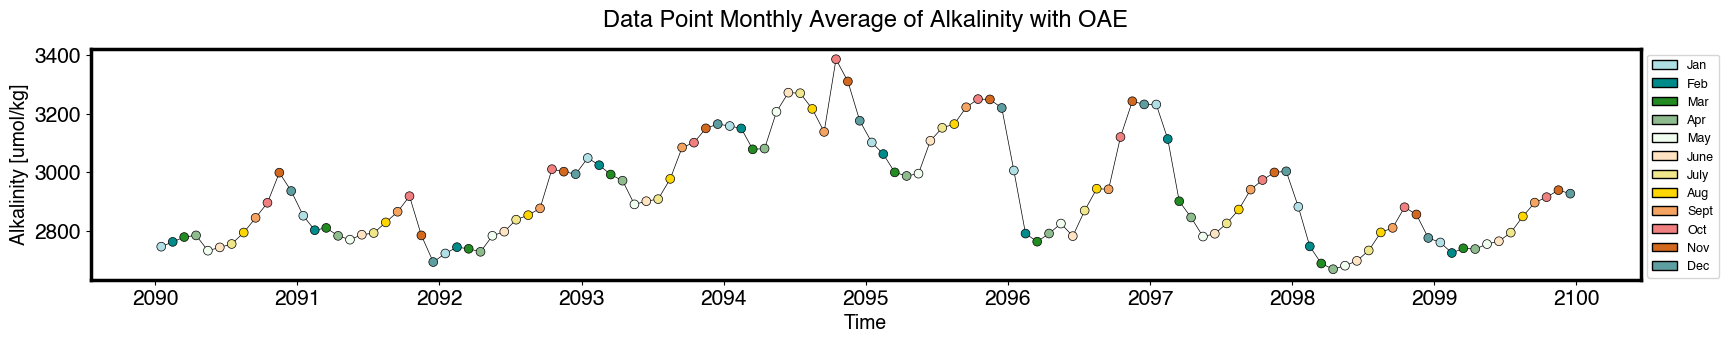

In [50]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.ALK, color=alk_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Data Point Monthly Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Data Point Monthly Average of Alkalinity (months displayed)

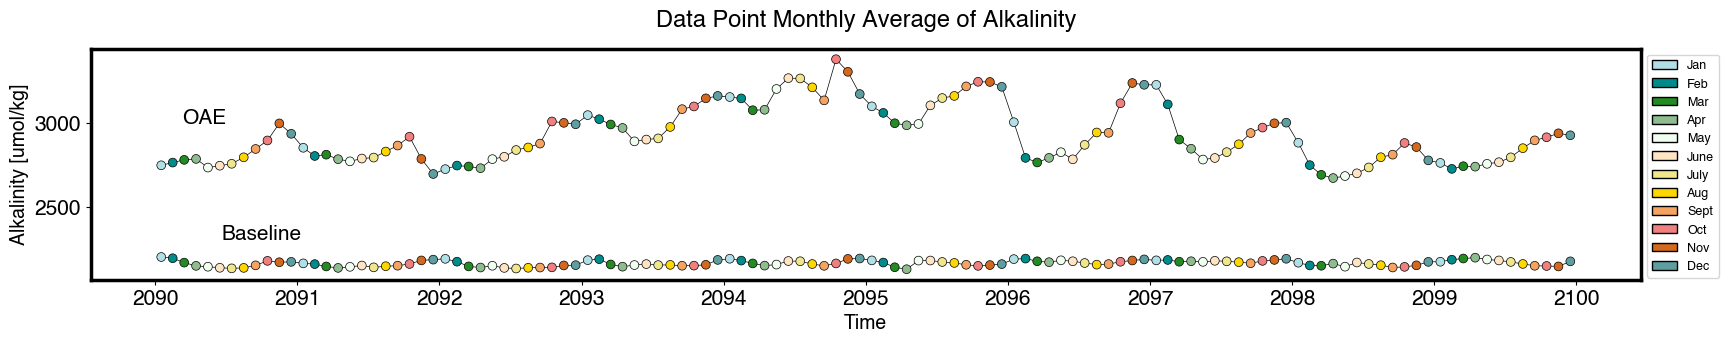

In [51]:
colors = dict(zip(alk_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(44000, 2300, s='Baseline')
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.ALK, color=alk_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43900, 3000, s='OAE')
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.ALK, color=alk_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Data Point Monthly Average of Alkalinity", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Alkalinity/figs/DPAlk_monthly_mean.png')

pass

### Δ Alkalinity between Baseline and OAE scenario

In [56]:
delta_alk = alk_oae_monthly.ALK - alk_baseline_monthly.ALK

In [57]:
delta_alk = delta_alk.to_xarray()

In [58]:
delta_alk = delta_alk.to_dataframe('ALK')
delta_alk['Month'] = pd.DatetimeIndex(delta_alk.index).month

In [59]:
conditions = [
    (delta_alk['Month'] == 1),
    (delta_alk['Month'] == 2),
    (delta_alk['Month'] == 3),
    (delta_alk['Month'] == 4),
    (delta_alk['Month'] == 5),
    (delta_alk['Month'] == 6),
    (delta_alk['Month'] == 7),
    (delta_alk['Month'] == 8),
    (delta_alk['Month'] == 9),
    (delta_alk['Month'] == 10),
    (delta_alk['Month'] == 11),
    (delta_alk['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_alk['Month'] = np.select(conditions, values)

In [60]:
colors = dict(zip(delta_alk.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

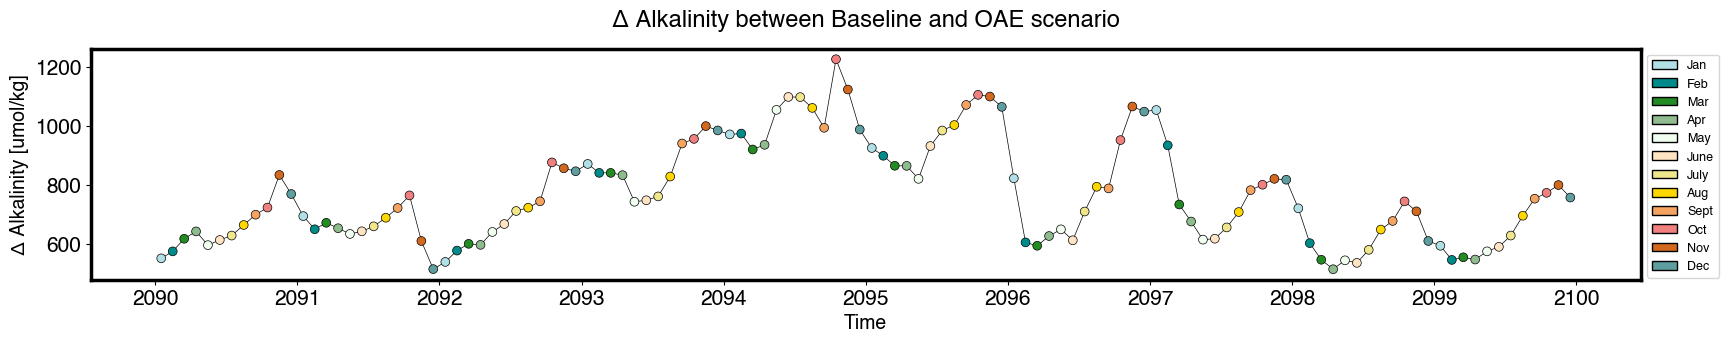

In [62]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_alk.index, delta_alk.ALK, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_alk.index, delta_alk.ALK, color=delta_alk.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Δ Alkalinity between Baseline and OAE scenario", fontname="Helvetica", fontsize=17, y=1.06)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/Alkalinity/figs/DPAlk_Δ_monthly_mean.png')

pass

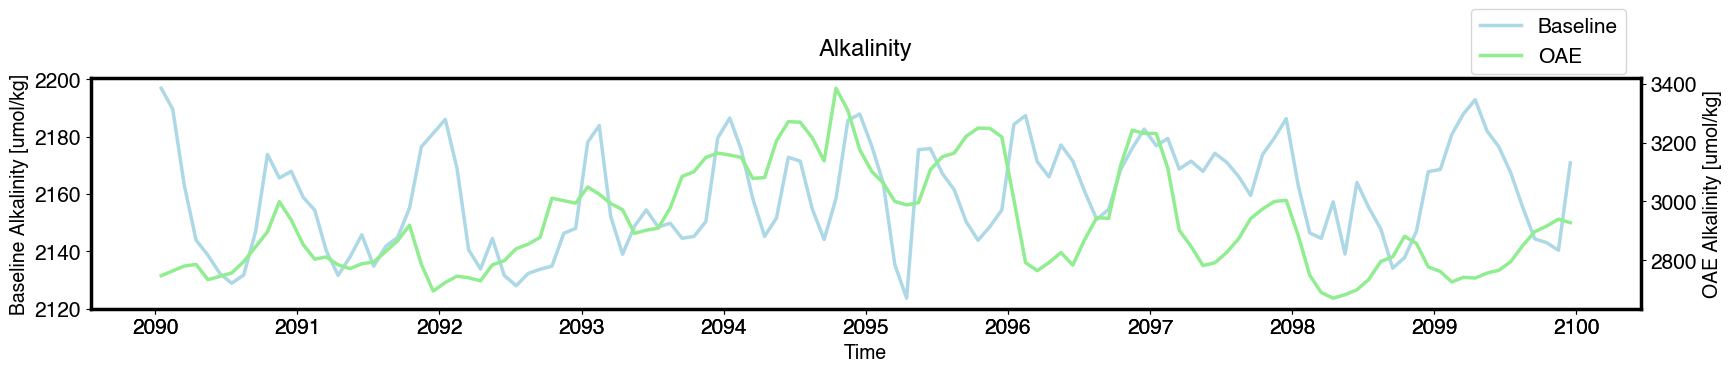

In [99]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_baseline_monthly.index, alk_baseline_monthly.ALK, linewidth=2.5, color="lightblue", label = 'Baseline', zorder=1)
ax.set_ylabel('Baseline Alkalinity [umol/kg]', fontsize=14)

ax2.plot(alk_oae_monthly.index, alk_oae_monthly.ALK, linewidth=2.5, color="lightgreen", label = 'OAE', zorder=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('OAE Alkalinity [umol/kg]', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()